In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
%matplotlib inline 

In [3]:
from sklearn.datasets import load_iris

iris = load_iris()

In [4]:
X = iris['data']
y = iris['target']

In [7]:
from sklearn.model_selection import train_test_split

X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [8]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier()

In [9]:
dtc.fit(X_train,y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


[Text(0.3076923076923077, 0.9285714285714286, 'x[2] <= 2.45\ngini = 0.664\nsamples = 105\nvalue = [31, 37, 37]'),
 Text(0.23076923076923078, 0.7857142857142857, 'gini = 0.0\nsamples = 31\nvalue = [31, 0, 0]'),
 Text(0.2692307692307693, 0.8571428571428572, 'True  '),
 Text(0.38461538461538464, 0.7857142857142857, 'x[2] <= 4.75\ngini = 0.5\nsamples = 74\nvalue = [0, 37, 37]'),
 Text(0.34615384615384615, 0.8571428571428572, '  False'),
 Text(0.15384615384615385, 0.6428571428571429, 'x[3] <= 1.6\ngini = 0.059\nsamples = 33\nvalue = [0, 32, 1]'),
 Text(0.07692307692307693, 0.5, 'gini = 0.0\nsamples = 32\nvalue = [0, 32, 0]'),
 Text(0.23076923076923078, 0.5, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(0.6153846153846154, 0.6428571428571429, 'x[3] <= 1.75\ngini = 0.214\nsamples = 41\nvalue = [0, 5, 36]'),
 Text(0.38461538461538464, 0.5, 'x[2] <= 4.95\ngini = 0.5\nsamples = 8\nvalue = [0, 4, 4]'),
 Text(0.3076923076923077, 0.35714285714285715, 'gini = 0.0\nsamples = 2\nvalue = [0, 2, 

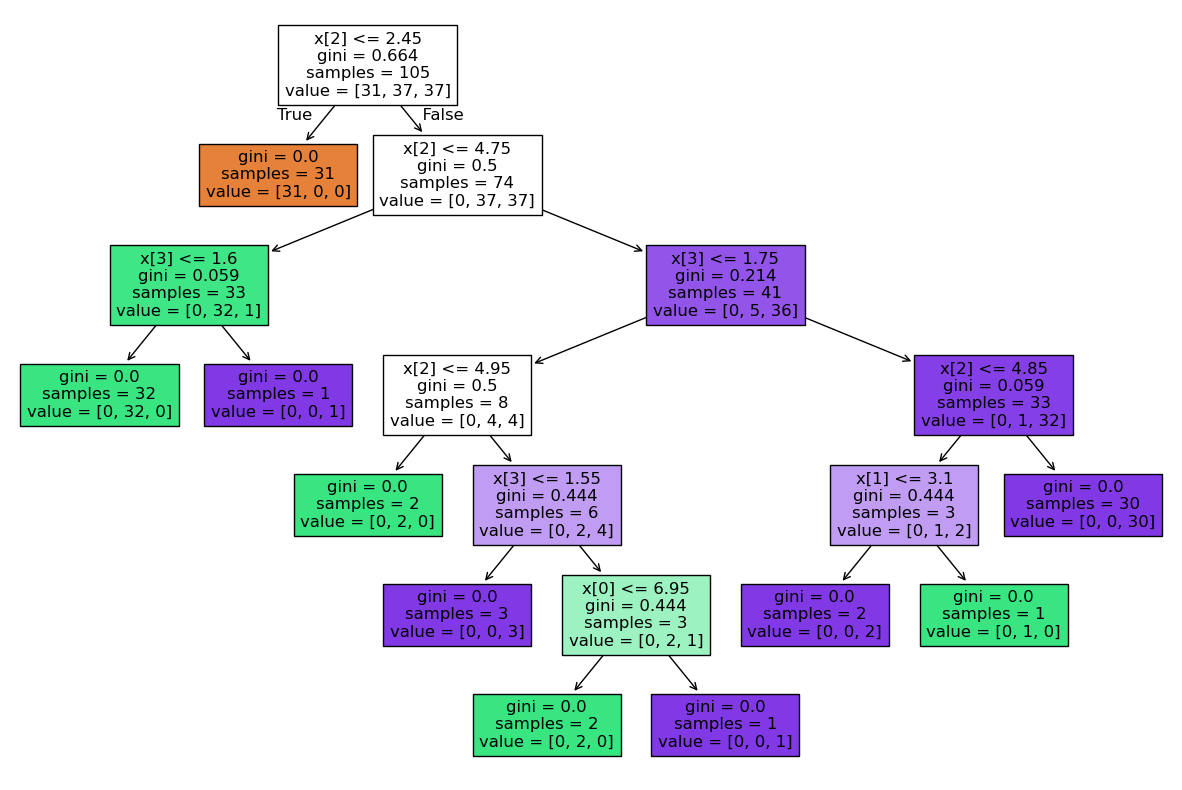

In [11]:
from sklearn import tree
plt.figure(figsize=(15,10))
tree.plot_tree(dtc,filled=True)

In [12]:
dtc2 = DecisionTreeClassifier(max_depth=2)

In [13]:
dtc2.fit(X_train,y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,2
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


[Text(0.4, 0.8333333333333334, 'x[2] <= 2.45\ngini = 0.664\nsamples = 105\nvalue = [31, 37, 37]'),
 Text(0.2, 0.5, 'gini = 0.0\nsamples = 31\nvalue = [31, 0, 0]'),
 Text(0.30000000000000004, 0.6666666666666667, 'True  '),
 Text(0.6, 0.5, 'x[3] <= 1.75\ngini = 0.5\nsamples = 74\nvalue = [0, 37, 37]'),
 Text(0.5, 0.6666666666666667, '  False'),
 Text(0.4, 0.16666666666666666, 'gini = 0.214\nsamples = 41\nvalue = [0, 36, 5]'),
 Text(0.8, 0.16666666666666666, 'gini = 0.059\nsamples = 33\nvalue = [0, 1, 32]')]

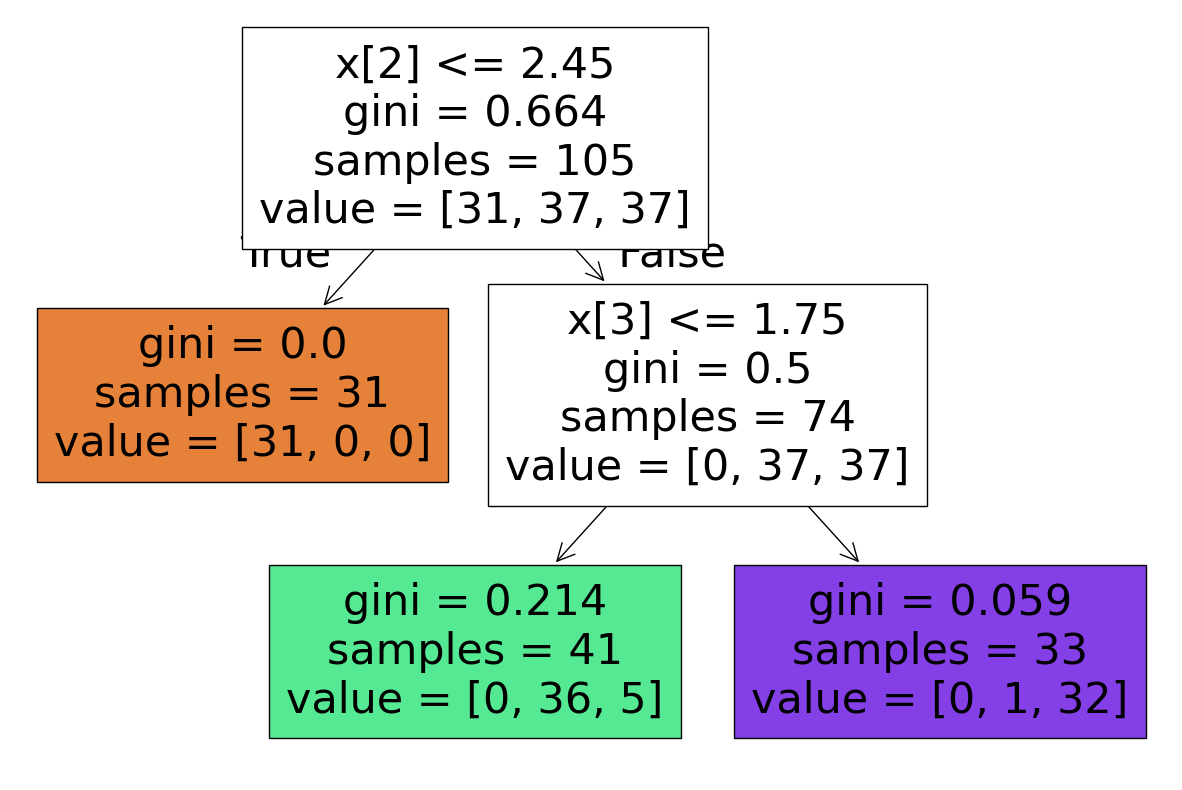

In [14]:
plt.figure(figsize=(15,10))
tree.plot_tree(dtc2,filled=True)

In [15]:
from sklearn.metrics import classification_report , confusion_matrix

y_pred = dtc.predict(X_test)
y_pred1 = dtc2.predict(X_test)

print(classification_report(y_pred,y_test))
print(classification_report(y_pred1,y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



DECISION TREE PRE-PRUNING AND HYPERPARAMETER TUNING

In [17]:
params = {
    'splitter':['best','random'],
    'criterion':['gini','entropy','log_loss'],
    'max_depth':[1,2,3,4,5,6],
    'max_features':['sqrt','log2']
}

In [18]:
from sklearn.model_selection import GridSearchCV

grid = GridSearchCV(estimator=dtc,param_grid=params,cv=5,scoring='accuracy')

In [20]:
grid.fit(X_train,y_train)

,estimator,DecisionTreeClassifier()
,param_grid,"{'criterion': ['gini', 'entropy', ...], 'max_depth': [1, 2, ...], 'max_features': ['sqrt', 'log2'], 'splitter': ['best', 'random']}"
,scoring,'accuracy'
,n_jobs,None
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,criterion,'entropy'


In [21]:
grid.best_params_

{'criterion': 'entropy',
 'max_depth': 5,
 'max_features': 'sqrt',
 'splitter': 'random'}

In [22]:
grid.best_score_

np.float64(0.9523809523809523)